# IBM Applied Data Science Capstone Course by Coursera
### Week 5 Final Report
**_Opening a New Coffee Shop in Jakarta_**
- Build a dataframe of districts neighborhood in Jakarta, Indonesia
- Obtain the venue data for the neighborhoods from Foursquare API
- Explore and cluster the neighborhoods
- Select the best cluster to open a new coffee shop
***
### 1. Import libraries

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

import json # library to handle JSON files

from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe
import requests

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors
import matplotlib.pyplot as plt

# import k-means from clustering stage
from sklearn.cluster import KMeans

import folium # map rendering library

print("Libraries imported.")

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


Libraries imported.


### 2. Scrap data from csv into a DataFrame

In [2]:
# send the GET request
data = pd.read_csv('jkt_district.csv') 

In [3]:
# print the number of rows of the dataframe
len(data)

42

### 3. Map geographical coordinates

In [10]:
# create map of Toronto using latitude and longitude values
map_jkt = folium.Map(location=[-6.2194891,106.8562831], zoom_start=11)

# add markers to map
for idx,row in data.iterrows():
    label = '{}'.format(row['kecamatan'])
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [row['lat'], row['lon']],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7).add_to(map_jkt)  
    
map_jkt

In [11]:
# save the map as HTML file
map_jkt.save('map_jkt.html')

### 4. Use the Foursquare API to explore the neighborhoods

In [38]:
# define Foursquare Credentials and Version
CLIENT_ID = 'use your foursquare ID' # your Foursquare ID
CLIENT_SECRET = 'use your foursquare secret' # your Foursquare Secret
VERSION = '20180323' # Foursquare API version

**Now, let's get the top 100 venues that are within a radius of 2000 meters.**

In [13]:
radius = 2000
LIMIT = 100

venues = []

for idx,row in data.iterrows():
    
    # create the API request URL
    url = "https://api.foursquare.com/v2/venues/explore?client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}".format(
        CLIENT_ID,
        CLIENT_SECRET,
        VERSION,
        row['lat'],
        row['lon'],
        radius, 
        LIMIT)
    # make the GET request
    results = requests.get(url).json()["response"]['groups'][0]['items']
    
    # return only relevant information for each nearby venue
    for venue in results:
        venues.append((
            row['kecamatan'],
            row['lat'], 
            row['lon'], 
            venue['venue']['id'],
            venue['venue']['name'], 
            venue['venue']['location']['lat'], 
            venue['venue']['location']['lng'],  
            venue['venue']['categories'][0]['name'],
            venue['venue']['stats']['usersCount'],
            venue['venue']['stats']['checkinsCount'],
            venue['venue']['stats']['visitsCount'],
            venue['venue']['photos']['count']
        ))

In [14]:
# convert the venues list into a new DataFrame
venues_df = pd.DataFrame(venues)

# define the column names
venues_df.columns = ['Neighborhood', 'Latitude', 'Longitude', 'VenueID', 'VenueName', 'VenueLatitude', 'VenueLongitude', 'VenueCategory', 'CountUsers', 'CountCheckins', 'CountVisits', 'CountPhotos']

print(venues_df.shape)
venues_df.head(10)

(3423, 12)


,Neighborhood,Latitude,Longitude,VenueID,VenueName,VenueLatitude,VenueLongitude,VenueCategory,CountUsers,CountCheckins,CountVisits,CountPhotos
0,sawah besar,-6.152958,106.832571,4b9f38f2f964a5209d1837e3,Rumah Makan Medan Baru,-6.158865,106.831763,Indonesian Restaurant,0,0,0,0
1,sawah besar,-6.152958,106.832571,4c38bbac6ec69c749dc704a9,Gado Gado Tamansari Raya,-6.152726,106.827043,Salad Place,0,0,0,0
2,sawah besar,-6.152958,106.832571,5bbb720cc58ed7002cc6cde4,Starbucks - Rs Husada,-6.147282,106.828670,Coffee Shop,0,0,0,0
3,sawah besar,-6.152958,106.832571,4c4bd990f7cc1b8dc8e87340,Nasi Campur ALU,-6.151378,106.825905,BBQ Joint,0,0,0,0
4,sawah besar,-6.152958,106.832571,4be56150910020a179ddd214,Fashion hotel,-6.149079,106.835513,Hotel,0,0,0,0
5,sawah besar,-6.152958,106.832571,4c1c66caeac020a1759246c2,Es Campur Ko Acia,-6.148447,106.829944,Dessert Shop,0,0,0,0
6,sawah besar,-6.152958,106.832571,4f155309e4b045626af6c3f1,Travel Hotel,-6.151041,106.825886,Hotel Bar,0,0,0,0
7,sawah besar,-6.152958,106.832571,4ea80ec9f9f4e0745dafffa1,Hokian Lomie Mikado,-6.159956,106.832026,Chinese Restaurant,0,0,0,0
8,sawah besar,-6.152958,106.832571,57889b6e498e40330eb28a56,Bakso Rusuk Samanhudi,-6.162285,106.829886,Indonesian Meatball Place,0,0,0,0
9,sawah besar,-6.152958,106.832571,4e2eac4622717d7058581b82,Swiss-Cafe,-6.149103,106.833972,Restaurant,0,0,0,0


In [15]:
jkt_coffee = venues_df[venues_df['VenueCategory']=='Coffee Shop']
jkt_coffee

,Neighborhood,Latitude,Longitude,VenueID,VenueName,VenueLatitude,VenueLongitude,VenueCategory,CountUsers,CountCheckins,CountVisits,CountPhotos
2,sawah besar,-6.152958,106.832571,5bbb720cc58ed7002cc6cde4,Starbucks - Rs Husada,-6.147282,106.828670,Coffee Shop,0,0,0,0
22,sawah besar,-6.152958,106.832571,5783a0ff498ee3d0ff7299de,Starbucks,-6.166622,106.833779,Coffee Shop,0,0,0,0
82,sawah besar,-6.152958,106.832571,5597b122498ef8eb6aa5a9a8,STARBUCKS Coffee JIExpo Kemayoran,-6.143499,106.845047,Coffee Shop,0,0,0,0
84,sawah besar,-6.152958,106.832571,4c50df80bd0995218ddf585e,Starbucks,-6.152059,106.817362,Coffee Shop,0,0,0,0
90,sawah besar,-6.152958,106.832571,5ab9c5cbc58ed73e140791ed,Starbucks,-6.164762,106.820439,Coffee Shop,0,0,0,0
101,cempaka putih,-6.182035,106.866739,588ebb6418384c6bf1e8d4d1,Starbucks,-6.188838,106.874354,Coffee Shop,0,0,0,0
103,cempaka putih,-6.182035,106.866739,4ce8e4c194daa090eb911d29,Starbucks,-6.177065,106.875270,Coffee Shop,0,0,0,0
125,cempaka putih,-6.182035,106.866739,4cb32b2339458cfad36018a0,Starbucks,-6.171625,106.863239,Coffee Shop,0,0,0,0
129,cempaka putih,-6.182035,106.866739,4cb50019589f236a37482d3d,Starbucks Coffee,-6.169607,106.868399,Coffee Shop,0,0,0,0
130,cempaka putih,-6.182035,106.866739,52ed0299498e220cbd51be77,Kopi Oey,-6.176534,106.872551,Coffee Shop,0,0,0,0


**Let's check how many venues were returned for each neighorhood**

In [16]:
venues_df.groupby(["Neighborhood"]).count()

,Latitude,Longitude,VenueID,VenueName,VenueLatitude,VenueLongitude,VenueCategory,CountUsers,CountCheckins,CountVisits,CountPhotos
Neighborhood,,,,,,,,,,,
cakung,24,24,24,24,24,24,24,24,24,24,24
cempaka putih,100,100,100,100,100,100,100,100,100,100,100
cengkareng,50,50,50,50,50,50,50,50,50,50,50
cilandak,100,100,100,100,100,100,100,100,100,100,100
cilincing,3,3,3,3,3,3,3,3,3,3,3
cipayung,22,22,22,22,22,22,22,22,22,22,22
ciracas,34,34,34,34,34,34,34,34,34,34,34
duren sawit,62,62,62,62,62,62,62,62,62,62,62
gambir,100,100,100,100,100,100,100,100,100,100,100


**Let's find out how many unique categories can be curated from all the returned venues**

In [17]:
print('There are {} uniques categories.'.format(len(venues_df['VenueCategory'].unique())))

There are 244 uniques categories.


In [18]:
# print out the list of categories
venues_df['VenueCategory'].unique()[:50]

array(['Indonesian Restaurant', 'Salad Place', 'Coffee Shop', 'BBQ Joint',
       'Hotel', 'Dessert Shop', 'Hotel Bar', 'Chinese Restaurant',
       'Indonesian Meatball Place', 'Restaurant', 'Theater',
       'Concert Hall', 'Noodle House', 'Art Gallery', 'Donut Shop',
       'Office', 'Food Truck', 'Vegetarian / Vegan Restaurant',
       'Sandwich Place', 'Bed & Breakfast', 'Seafood Restaurant',
       'Asian Restaurant', 'Racetrack', 'Diner', 'Japanese Restaurant',
       'Steakhouse', 'Pizza Place', 'Bakery', 'Korean Restaurant',
       'Supermarket', 'Soup Place', 'Fried Chicken Joint',
       'Sundanese Restaurant', 'American Restaurant',
       'Cantonese Restaurant', 'Nightclub', 'Snack Place',
       'Shopping Mall', 'Music Festival', 'Dim Sum Restaurant',
       'Sporting Goods Shop', 'Padangnese Restaurant',
       'Fast Food Restaurant', 'Multiplex', 'Moroccan Restaurant',
       'Bistro', 'Acehnese Restaurant', 'Farmers Market', 'Market',
       'Athletics & Sports'], dtyp

### 5. Analyze Each Neighborhood

In [19]:
# one hot encoding
jkt_onehot = pd.get_dummies(venues_df[['VenueCategory']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
jkt_onehot['Neighborhoods'] = venues_df['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [jkt_onehot.columns[-1]] + list(jkt_onehot.columns[:-1])
jkt_onehot = jkt_onehot[fixed_columns]

print(jkt_onehot.shape)
jkt_onehot.head()

(3423, 245)


,Neighborhoods,Accessories Store,Acehnese Restaurant,African Restaurant,Airport,Airport Lounge,Airport Terminal,American Restaurant,Aquarium,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Auto Dealership,Auto Workshop,Automotive Shop,BBQ Joint,Badminton Court,Bagel Shop,Bakery,Balinese Restaurant,Bank,Bar,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Bed & Breakfast,Beer Garden,Betawinese Restaurant,Big Box Store,Bistro,Board Shop,Boarding House,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Bridal Shop,Bubble Tea Shop,Buffet,Building,Burger Joint,Butcher,Cafeteria,Café,Camera Store,Cantonese Restaurant,Car Wash,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Coffee Shop,College Cafeteria,College Residence Hall,Comedy Club,Comfort Food Restaurant,Concert Hall,Convenience Store,Convention Center,Cosmetics Shop,Creperie,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Doctor's Office,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Elementary School,Event Space,Fabric Shop,Factory,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,General College & University,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hardware Store,Health & Beauty Service,High School,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hospital,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Housing Development,Ice Cream Shop,Indian Restaurant,Indonesian Meatball Place,Indonesian Restaurant,Italian Restaurant,Japanese Restaurant,Javanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Korean Restaurant,Lighthouse,Lounge,Malay Restaurant,Manadonese Restaurant,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Moroccan Restaurant,Mosque,Motorcycle Shop,Movie Theater,Multiplex,Museum,Music Festival,Music School,Music Store,Music Venue,Nightclub,Noodle House,Office,Optical Shop,Other Great Outdoors,Padangnese Restaurant,Palace,Paper / Office Supplies Store,Park,Performing Arts Venue,Pet Store,Pharmacy,Photography Studio,Piano Bar,Pizza Place,Playground,Plaza,Pool,Pool Hall,Pub,Public Art,Racetrack,Ramen Restaurant,Recreation Center,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Satay Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Snack Place,Soba Restaurant,Soccer Field,Soccer Stadium,Soup Place,South American Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Steakhouse,Street Food Gathering,Sundanese Restaurant,Supermarket,Sushi Restaurant,Tanning Salon,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Toy / Game Store,Track,Trail,Train,Train Station,Travel Agency,Turkish Restaurant,Udon Restaurant,University,Vacation Rental,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Water Park,Wine Bar,Winery,Wings Joint,Women's Store,Yoga Studio
0,sawah besar,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

**Next, let's group rows by neighborhood and by taking the mean of the frequency of occurrence of each category**

In [20]:
jkt_grouped = jkt_onehot.groupby(["Neighborhoods"]).mean().reset_index()

print(jkt_grouped.shape)
jkt_grouped

(42, 245)


,Neighborhoods,Accessories Store,Acehnese Restaurant,African Restaurant,Airport,Airport Lounge,Airport Terminal,American Restaurant,Aquarium,Arcade,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Australian Restaurant,Auto Dealership,Auto Workshop,Automotive Shop,BBQ Joint,Badminton Court,Bagel Shop,Bakery,Balinese Restaurant,Bank,Bar,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Bed & Breakfast,Beer Garden,Betawinese Restaurant,Big Box Store,Bistro,Board Shop,Boarding House,Boat or Ferry,Bookstore,Boutique,Bowling Alley,Breakfast Spot,Bridal Shop,Bubble Tea Shop,Buffet,Building,Burger Joint,Butcher,Cafeteria,Café,Camera Store,Cantonese Restaurant,Car Wash,Chinese Restaurant,Chocolate Shop,Church,Clothing Store,Coffee Shop,College Cafeteria,College Residence Hall,Comedy Club,Comfort Food Restaurant,Concert Hall,Convenience Store,Convention Center,Cosmetics Shop,Creperie,Cupcake Shop,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Doctor's Office,Donut Shop,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Elementary School,Event Space,Fabric Shop,Factory,Farmers Market,Fast Food Restaurant,Field,Fish & Chips Shop,Flea Market,Flower Shop,Food,Food & Drink Shop,Food Court,Food Stand,Food Truck,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Gas Station,Gastropub,General College & University,General Entertainment,German Restaurant,Gift Shop,Golf Course,Gourmet Shop,Government Building,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Hardware Store,Health & Beauty Service,High School,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hospital,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Housing Development,Ice Cream Shop,Indian Restaurant,Indonesian Meatball Place,Indonesian Restaurant,Italian Restaurant,Japanese Restaurant,Javanese Restaurant,Jewelry Store,Juice Bar,Karaoke Bar,Korean Restaurant,Lighthouse,Lounge,Malay Restaurant,Manadonese Restaurant,Market,Martial Arts Dojo,Massage Studio,Mediterranean Restaurant,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Monument / Landmark,Moroccan Restaurant,Mosque,Motorcycle Shop,Movie Theater,Multiplex,Museum,Music Festival,Music School,Music Store,Music Venue,Nightclub,Noodle House,Office,Optical Shop,Other Great Outdoors,Padangnese Restaurant,Palace,Paper / Office Supplies Store,Park,Performing Arts Venue,Pet Store,Pharmacy,Photography Studio,Piano Bar,Pizza Place,Playground,Plaza,Pool,Pool Hall,Pub,Public Art,Racetrack,Ramen Restaurant,Recreation Center,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,Salad Place,Salon / Barbershop,Sandwich Place,Satay Restaurant,Seafood Restaurant,Shabu-Shabu Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Snack Place,Soba Restaurant,Soccer Field,Soccer Stadium,Soup Place,South American Restaurant,Spa,Spanish Restaurant,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Steakhouse,Street Food Gathering,Sundanese Restaurant,Supermarket,Sushi Restaurant,Tanning Salon,Tapas Restaurant,Tea Room,Thai Restaurant,Theater,Theme Park,Theme Park Ride / Attraction,Toy / Game Store,Track,Trail,Train,Train Station,Travel Agency,Turkish Restaurant,Udon Restaurant,University,Vacation Rental,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Water Park,Wine Bar,Winery,Wings Joint,Women's Store,Yoga Studio
0,cakung,0.000000,0.000000,0.00,0.000000,0.00000,0.000000,0.000000,0.00,0.000000,0.000000,0.00,0.00,0.041667,0.000000,0.00,0.00,0.000000,0.000000,0.000000,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.00,0.00,0.000000,0.00,0.000000,0.000000,0.000000,0.00,0.00,0.000000,0.041667,0.00,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.000000,0.00,0.041667,0.000000,0.00,0.00,0.000000,0.000000,0.00,0.000000,0.041667,0.041667,0.00,0.000000,0.000000,0.000000,0.000000,0

In [23]:
jkt_coffee = jkt_grouped[["Neighborhoods","Coffee Shop"]]
jkt_coffee.head()

,Neighborhoods,Coffee Shop
0,cakung,0.041667
1,cempaka putih,0.060000
2,cengkareng,0.020000
3,cilandak,0.170000
4,cilincing,0.000000


### 6. Cluster Area
Run k-means to cluster the neighborhoods in Jakarta based on Elbow Criterion Method to find the best K

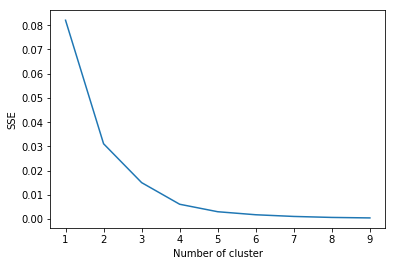

In [24]:
# set number of clusters
jkt_grouped_clustering = jkt_coffee.drop(["Neighborhoods"], 1)

sse = {}
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(jkt_grouped_clustering)
    data["clusters"] = kmeans.labels_
    #print(data["clusters"])
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()


### as we can see, 3 is the best K for these data
### Run K-means with K = 3

In [25]:
# set number of clusters
kclusters = 3

# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(jkt_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10] 

array([0, 2, 0, 1, 0, 0, 2, 2, 2, 2])

In [26]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
areaColumns = ['Neighborhoods']
freqColumns = []
for ind in np.arange(num_top_venues):
    try:
        freqColumns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        freqColumns.append('{}th Most Common Venue'.format(ind+1))
columns = areaColumns+freqColumns

# create a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhoods'] = jkt_grouped['Neighborhoods']

for ind in np.arange(jkt_grouped.shape[0]):
    row_categories = jkt_grouped.iloc[ind, :].iloc[3:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    neighborhoods_venues_sorted.iloc[ind, 1:] = row_categories_sorted.index.values[0:num_top_venues]

# neighborhoods_venues_sorted.sort_values(freqColumns, inplace=True)
print(neighborhoods_venues_sorted.shape)
neighborhoods_venues_sorted

(42, 11)


,Neighborhoods,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,cakung,Food Truck,Department Store,Hobby Shop,Donut Shop,Fast Food Restaurant,Pizza Place,Steakhouse,Supermarket,Cafeteria,Lounge
1,cempaka putih,Indonesian Restaurant,Coffee Shop,Café,Fast Food Restaurant,Restaurant,Convenience Store,Seafood Restaurant,Pizza Place,Food Truck,Hotel
2,cengkareng,Café,Pizza Place,Convenience Store,Dessert Shop,Chinese Restaurant,Fast Food Restaurant,Train Station,Fried Chicken Joint,Asian Restaurant,Flea Market
3,cilandak,Coffee Shop,Asian Restaurant,Café,Fast Food Restaurant,Chinese Restaurant,Hotel,Indonesian Restaurant,Bakery,Steakhouse,Motorcycle Shop
4,cilincing,Food & Drink Shop,Airport Terminal,Snack Place,Yoga Studio,Electronics Store,Food,Flower Shop,Flea Market,Fish & Chips Shop,Field
5,cipayung,Indonesian Restaurant,Convenience Store,Noodle House,Pizza Place,Rest Area,Café,Museum,Fast Food Restaurant,Soup Place,Miscellaneous Shop
6,ciracas,Fast Food Restaurant,Indonesian Restaurant,Convenience Store,Coffee Shop,Noodle House,Asian Restaurant,Garden,Stadium,Rest Area,Factory
7,duren sawit,Noodle House,Indonesian Meatball Place,Asian Restaurant,Fast Food Restaurant,Coffee Shop,Indonesian Restaurant,Restaurant,Salon / Barbershop,Café,Spa
8,gambir,Indonesian Restaurant,Noodle House,Hotel,Chinese Restaurant,Seafood Restaurant,Asian Restaurant,Coffee Shop,Padangnese Restaurant,Soup Place,Bakery
9,grogol petamburan,Chinese Restaurant,Noodle House,Coffee Shop,Clothing Store,Restaurant,Indonesian Restaurant,Shopping Mall,Sushi Restaurant,Japanese Restaurant,Spa


In [27]:
# create a new dataframe that includes the cluster as well as the top 10 venues for each neighborhood.
jkt_merged = jkt_grouped.copy()

# add clustering labels
neighborhoods_venues_sorted.head()
jkt_merged["Cluster Labels"] = kmeans.labels_

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
jkt_merged = jkt_merged.join(data.set_index("kecamatan"), on="Neighborhoods")

jkt_merged = jkt_merged.join(neighborhoods_venues_sorted.set_index("Neighborhoods"), on="Neighborhoods")

#select only preferable column
list(jkt_merged.columns.values)

jkt_merged = jkt_merged[['Neighborhoods',
    'kabupaten',
 'Cluster Labels',
 'lat',
 'lon',
'Coffee Shop',
 '1st Most Common Venue',
 '2nd Most Common Venue',
 '3rd Most Common Venue',
 '4th Most Common Venue',
 '5th Most Common Venue',
 '6th Most Common Venue',
 '7th Most Common Venue',
 '8th Most Common Venue',
 '9th Most Common Venue',
 '10th Most Common Venue'
                ]]

jkt_merged.head()

,Neighborhoods,kabupaten,Cluster Labels,lat,lon,Coffee Shop,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,cakung,kab. kodya jakarta timur,0,-6.189808,106.939408,0.041667,Food Truck,Department Store,Hobby Shop,Donut Shop,Fast Food Restaurant,Pizza Place,Steakhouse,Supermarket,Cafeteria,Lounge
1,cempaka putih,kab. kodya jakarta pusat,2,-6.182035,106.866739,0.060000,Indonesian Restaurant,Coffee Shop,Café,Fast Food Restaurant,Restaurant,Convenience Store,Seafood Restaurant,Pizza Place,Food Truck,Hotel
2,cengkareng,kab. kodya jakarta barat,0,-6.151473,106.737443,0.020000,Café,Pizza Place,Convenience Store,Dessert Shop,Chinese Restaurant,Fast Food Restaurant,Train Station,Fried Chicken Joint,Asian Restaurant,Flea Market
3,cilandak,kab. kodya jakarta selatan,1,-6.288974,106.794213,0.170000,Coffee Shop,Asian Restaurant,Café,Fast Food Restaurant,Chinese Restaurant,Hotel,Indonesian Restaurant,Bakery,Steakhouse,Motorcycle Shop
4,cilincing,kab. kodya jakarta utara,0,-6.123956,106.938039,0.000000,Food & Drink Shop,Airport Terminal,Snack Place,Yoga Studio,Electronics Store,Food,Flower Shop,Flea Market,Fish & Chips Shop,Field


In [28]:
print(jkt_merged.shape)
jkt_merged.sort_values(["Cluster Labels"], inplace=True)
jkt_merged

(42, 16)


,Neighborhoods,kabupaten,Cluster Labels,lat,lon,Coffee Shop,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,cakung,kab. kodya jakarta timur,0,-6.189808,106.939408,0.041667,Food Truck,Department Store,Hobby Shop,Donut Shop,Fast Food Restaurant,Pizza Place,Steakhouse,Supermarket,Cafeteria,Lounge
33,pulogadung,kab. kodya jakarta timur,0,-6.195944,106.890631,0.040000,Indonesian Restaurant,Restaurant,Asian Restaurant,Pizza Place,Chinese Restaurant,Coffee Shop,Noodle House,Fried Chicken Joint,Salon / Barbershop,Supermarket
32,pesanggrahan,kab. kodya jakarta selatan,0,-6.246957,106.758036,0.031746,Noodle House,Convenience Store,Indonesian Restaurant,Food Truck,Pizza Place,Fast Food Restaurant,Café,Electronics Store,Restaurant,Asian Restaurant
30,pasar rebo,kab. kodya jakarta timur,0,-6.325960,106.855982,0.000000,Noodle House,Indonesian Restaurant,Pizza Place,Convenience Store,Donut Shop,Fast Food Restaurant,Bakery,Café,Seafood Restaurant,Cafeteria
21,kramatjati,kab. kodya jakarta timur,0,-6.276859,106.865906,0.021277,Restaurant,Fast Food Restaurant,Pizza Place,Noodle House,Asian Restaurant,Bakery,Food Truck,Middle Eastern Restaurant,Indonesian Restaurant,Shopping Mall
40,tanjung priok,kab. kodya jakarta utara,0,-6.128501,106.877419,0.021978,Asian Restaurant,Seafood Restaurant,Chinese Restaurant,Noodle House,Indonesian Restaurant,Pizza Place,Fast Food Restaurant,Dessert Shop,BBQ Joint,Grocery Store
18,kemayoran,kab. kodya jakarta pusat,0,-6.163641,106.855970,0.023529,Indonesian Restaurant,Hotel,Chinese Restaurant,Café,Food Court,Seafood Restaurant,Indonesian Meatball Place,Food Truck,Miscellaneous Shop,Coffee Shop
10,jagakarsa,kab. kodya jakarta selatan,0,-6.332687,106.823138,0.041667,Indonesian Restaurant,Café,Convenience Store,Food Truck,Asian Restaurant,Food Court,Soccer Stadium,Train Station,Fast Food Restaurant,Coffee Shop
20,koja,kab. kodya jakarta utara,0,-6.121772,106.904721,0.000000,Indonesian Restaurant,Pizza Place,Restaurant,Bakery,Convenience Store,Miscellaneous Shop,Indonesian Meatball Place,Seafood Restaurant,Chinese Restaurant,Salon / Barbershop
4,cilincing,kab. kodya jakarta utara,0,-6.123956,106.938039,0.000000,Food & Drink Shop,Airport Terminal,Snack Place,Yoga Studio,Electronics Store,Food,Flower Shop,Flea Market,Fish & Chips Shop,Field


In [36]:
# create map
map_clusters = folium.Map(location=[-6.2194891,106.8562831], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(jkt_merged['lat'], jkt_merged['lon'], jkt_merged['Neighborhoods'], jkt_merged['Cluster Labels']+1):
    label = folium.Popup(' {} - Cluster {}'.format(poi, cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

In [37]:
# save the map as HTML file
map_clusters.save('map_clust_jkt.html')

### Examine Clusters
#### Cluster 1

In [33]:
jkt_merged.loc[jkt_merged['Cluster Labels'] == 0]

,Neighborhoods,kabupaten,Cluster Labels,lat,lon,Coffee Shop,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,cakung,kab. kodya jakarta timur,0,-6.189808,106.939408,0.041667,Food Truck,Department Store,Hobby Shop,Donut Shop,Fast Food Restaurant,Pizza Place,Steakhouse,Supermarket,Cafeteria,Lounge
33,pulogadung,kab. kodya jakarta timur,0,-6.195944,106.890631,0.040000,Indonesian Restaurant,Restaurant,Asian Restaurant,Pizza Place,Chinese Restaurant,Coffee Shop,Noodle House,Fried Chicken Joint,Salon / Barbershop,Supermarket
32,pesanggrahan,kab. kodya jakarta selatan,0,-6.246957,106.758036,0.031746,Noodle House,Convenience Store,Indonesian Restaurant,Food Truck,Pizza Place,Fast Food Restaurant,Café,Electronics Store,Restaurant,Asian Restaurant
30,pasar rebo,kab. kodya jakarta timur,0,-6.325960,106.855982,0.000000,Noodle House,Indonesian Restaurant,Pizza Place,Convenience Store,Donut Shop,Fast Food Restaurant,Bakery,Café,Seafood Restaurant,Cafeteria
21,kramatjati,kab. kodya jakarta timur,0,-6.276859,106.865906,0.021277,Restaurant,Fast Food Restaurant,Pizza Place,Noodle House,Asian Restaurant,Bakery,Food Truck,Middle Eastern Restaurant,Indonesian Restaurant,Shopping Mall
40,tanjung priok,kab. kodya jakarta utara,0,-6.128501,106.877419,0.021978,Asian Restaurant,Seafood Restaurant,Chinese Restaurant,Noodle House,Indonesian Restaurant,Pizza Place,Fast Food Restaurant,Dessert Shop,BBQ Joint,Grocery Store
18,kemayoran,kab. kodya jakarta pusat,0,-6.163641,106.855970,0.023529,Indonesian Restaurant,Hotel,Chinese Restaurant,Café,Food Court,Seafood Restaurant,Indonesian Meatball Place,Food Truck,Miscellaneous Shop,Coffee Shop
10,jagakarsa,kab. kodya jakarta selatan,0,-6.332687,106.823138,0.041667,Indonesian Restaurant,Café,Convenience Store,Food Truck,Asian Restaurant,Food Court,Soccer Stadium,Train Station,Fast Food Restaurant,Coffee Shop
20,koja,kab. kodya jakarta utara,0,-6.121772,106.904721,0.000000,Indonesian Restaurant,Pizza Place,Restaurant,Bakery,Convenience Store,Miscellaneous Shop,Indonesian Meatball Place,Seafood Restaurant,Chinese Restaurant,Salon / Barbershop
4,cilincing,kab. kodya jakarta utara,0,-6.123956,106.938039,0.000000,Food & Drink Shop,Airport Terminal,Snack Place,Yoga Studio,Electronics Store,Food,Flower Shop,Flea Market,Fish & Chips Shop,Field


#### Cluster 2

In [34]:
jkt_merged.loc[jkt_merged['Cluster Labels'] == 1]

,Neighborhoods,kabupaten,Cluster Labels,lat,lon,Coffee Shop,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
27,pal merah,kab. kodya jakarta barat,1,-6.189002,106.798577,0.1100,Coffee Shop,Chinese Restaurant,Hotel,Dessert Shop,Pizza Place,Clothing Store,Shopping Mall,Sushi Restaurant,Japanese Restaurant,Bubble Tea Shop
3,cilandak,kab. kodya jakarta selatan,1,-6.288974,106.794213,0.1700,Coffee Shop,Asian Restaurant,Café,Fast Food Restaurant,Chinese Restaurant,Hotel,Indonesian Restaurant,Bakery,Steakhouse,Motorcycle Shop
22,makasar,kab. kodya jakarta timur,1,-6.267743,106.887794,0.1875,Golf Course,Coffee Shop,Indonesian Restaurant,Asian Restaurant,Indonesian Meatball Place,Fast Food Restaurant,Steakhouse,Seafood Restaurant,Donut Shop,Juice Bar
36,setiabudi,kab. kodya jakarta selatan,1,-6.216270,106.830222,0.1800,Coffee Shop,Hotel,Steakhouse,Japanese Restaurant,Ice Cream Shop,Shopping Mall,Javanese Restaurant,Asian Restaurant,Indonesian Restaurant,Sushi Restaurant
14,kebayoran baru,kab. kodya jakarta selatan,1,-6.243976,106.802370,0.1100,Coffee Shop,Japanese Restaurant,Indonesian Restaurant,Hotel,Asian Restaurant,Korean Restaurant,Chinese Restaurant,Sushi Restaurant,Bakery,Food Truck
28,pancoran,kab. kodya jakarta selatan,1,-6.253196,106.846305,0.1250,Coffee Shop,Indonesian Restaurant,Asian Restaurant,Noodle House,Pizza Place,Park,Bakery,Spa,Food Truck,Supermarket
31,penjaringan,kab. kodya jakarta utara,1,-6.120833,106.774103,0.1200,Chinese Restaurant,Coffee Shop,Seafood Restaurant,Noodle House,Café,Bakery,Sushi Restaurant,Balinese Restaurant,Indonesian Restaurant,Restaurant


#### Cluster 3

In [35]:
jkt_merged.loc[jkt_merged['Cluster Labels'] == 2]

,Neighborhoods,kabupaten,Cluster Labels,lat,lon,Coffee Shop,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
29,pasar minggu,kab. kodya jakarta selatan,2,-6.290114,106.831325,0.070000,Indonesian Restaurant,Coffee Shop,Convenience Store,Food Truck,Asian Restaurant,Noodle House,Café,Chinese Restaurant,Pizza Place,Breakfast Spot
9,grogol petamburan,kab. kodya jakarta barat,2,-6.164118,106.787194,0.080000,Chinese Restaurant,Noodle House,Coffee Shop,Clothing Store,Restaurant,Indonesian Restaurant,Shopping Mall,Sushi Restaurant,Japanese Restaurant,Spa
35,senen,kab. kodya jakarta pusat,2,-6.183560,106.845451,0.070000,Indonesian Restaurant,Hotel,Coffee Shop,Café,Chinese Restaurant,Restaurant,Asian Restaurant,Seafood Restaurant,Betawinese Restaurant,Multiplex
37,taman sari,kab. kodya jakarta barat,2,-6.148835,106.818143,0.060000,Chinese Restaurant,Noodle House,Asian Restaurant,Coffee Shop,Hotel,Bakery,Seafood Restaurant,Food Truck,Steakhouse,BBQ Joint
38,tambora,kab. kodya jakarta barat,2,-6.148661,106.803828,0.050000,Chinese Restaurant,Noodle House,Asian Restaurant,Coffee Shop,Café,Bakery,Steakhouse,Food Truck,Supermarket,Japanese Restaurant
39,tanah abang,kab. kodya jakarta pusat,2,-6.200213,106.811674,0.100000,Coffee Shop,Hotel,Chinese Restaurant,Indonesian Restaurant,Restaurant,Clothing Store,Café,Steakhouse,Lounge,Food Truck
34,sawah besar,kab. kodya jakarta pusat,2,-6.152958,106.832571,0.050000,Chinese Restaurant,Noodle House,Hotel,Seafood Restaurant,Coffee Shop,Asian Restaurant,Bakery,BBQ Joint,Fried Chicken Joint,Food Truck
1,cempaka putih,kab. kodya jakarta pusat,2,-6.182035,106.866739,0.060000,Indonesian Restaurant,Coffee Shop,Café,Fast Food Restaurant,Restaurant,Convenience Store,Seafood Restaurant,Pizza Place,Food Truck,Hotel
25,menteng,kab. kodya jakarta pusat,2,-6.194293,106.836251,0.060000,Indonesian Restaurant,Hotel,Coffee Shop,Restaurant,Japanese Restaurant,Steakhouse,Chinese Restaurant,Bakery,Thai Restaurant,Lounge
8,gambir,kab. kodya jakarta pusat,2,-6.169515,106.815927,0.050000,Indonesian Restaurant,Noodle House,Hotel,Chinese Restaurant,Seafood Restaurant,Asian Restaurant,Coffee Shop,Padangnese Restaurant,Soup Place,Bakery


#### Observations:
Most of the Coffee Shop are concentrated in the South Jakarta city, with the highest number in cluster 2 and moderate number in cluster 3. On the other hand, cluster 1 has very low number to totally no Coffee Shop in the neighborhoods. This represents a great opportunity and high potential areas to open new Coffee Shop as there is very little to no competition from existing malls. Meanwhile, Coffee Shop in cluster 2 are likely suffering from intense competition due to oversupply and high concentration of Coffee Shop. 

From another perspective, this also shows that the oversupply of coffee shop mostly happened in the shoutern area, with the central and northern area still have very few coffee shop. 

Therefore, this project recommends coffee shop inventors on these findings to open new coffee shop in neighborhoods in cluster 1 with little to no competition. Meanwhile, coffee shop inventors with unique selling propositions to stand out from the competition can also open new coffee shop in neighborhoods in cluster 3 with moderate competition. 

Lastly, Coffee Shop inventors to avoid neighborhoods in cluster 2 which already have high concentration of Cofee Shop and suffering from intense competition.